# Introduction to Signals and Systems: operations over signals

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import IPython.display as ipd
import warnings

# Suppress librosa deprecation warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning, module='librosa')

import librosa

# Set up plotting parameters
plt.rcParams['figure.figsize'] = (12, 4)
audio_file = 'my_voice.m4a'  # Change to your file path

# Load audio using librosa (automatically handles all formats and converts to mono)
audio_data, sample_rate = librosa.load(audio_file, sr=None, mono=True)

duration = len(audio_data) / sample_rate

print(f"\nThe file plays for {duration : .4f} s")
print(f"Sample Rate: {sample_rate} Hz")
print(f"Data type: {audio_data.dtype}")
print(f"Value range: [{audio_data.min():.3f}, {audio_data.max():.3f}]")

# Play the audio in the notebook
ipd.Audio(audio_data, rate=sample_rate)


The file plays for  4.6293 s
Sample Rate: 48000 Hz
Data type: float32
Value range: [-0.617, 0.520]


C:\Users\cesar\AppData\Local\Temp\ipykernel_46628\2577500012.py:18: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sample_rate = librosa.load(audio_file, sr=None, mono=True)


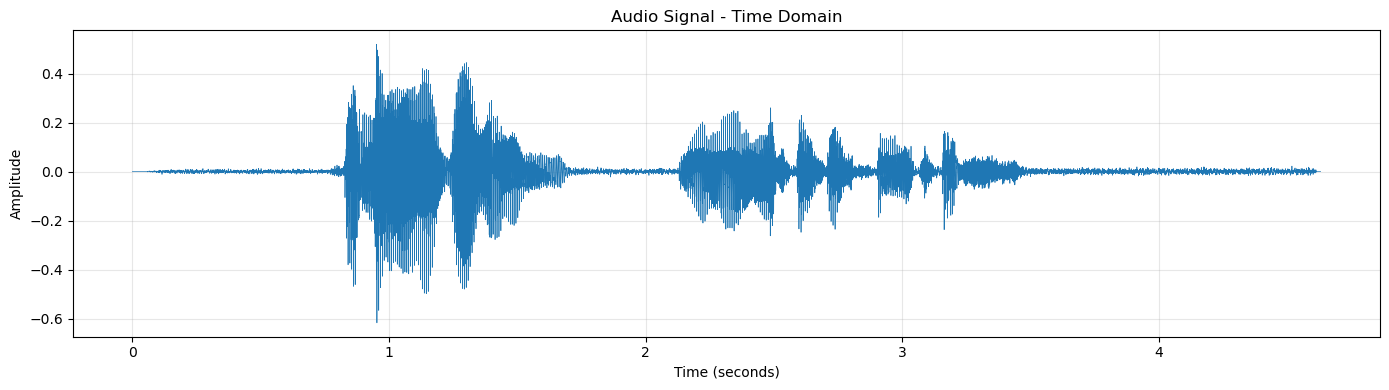

In [3]:
# Create time axis
time = np.linspace(0, duration, len(audio_data))

# Plot the entire signal
plt.figure(figsize=(14, 4))
plt.plot(time, audio_data, linewidth=0.5)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Audio Signal - Time Domain')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Basic Signals Operation

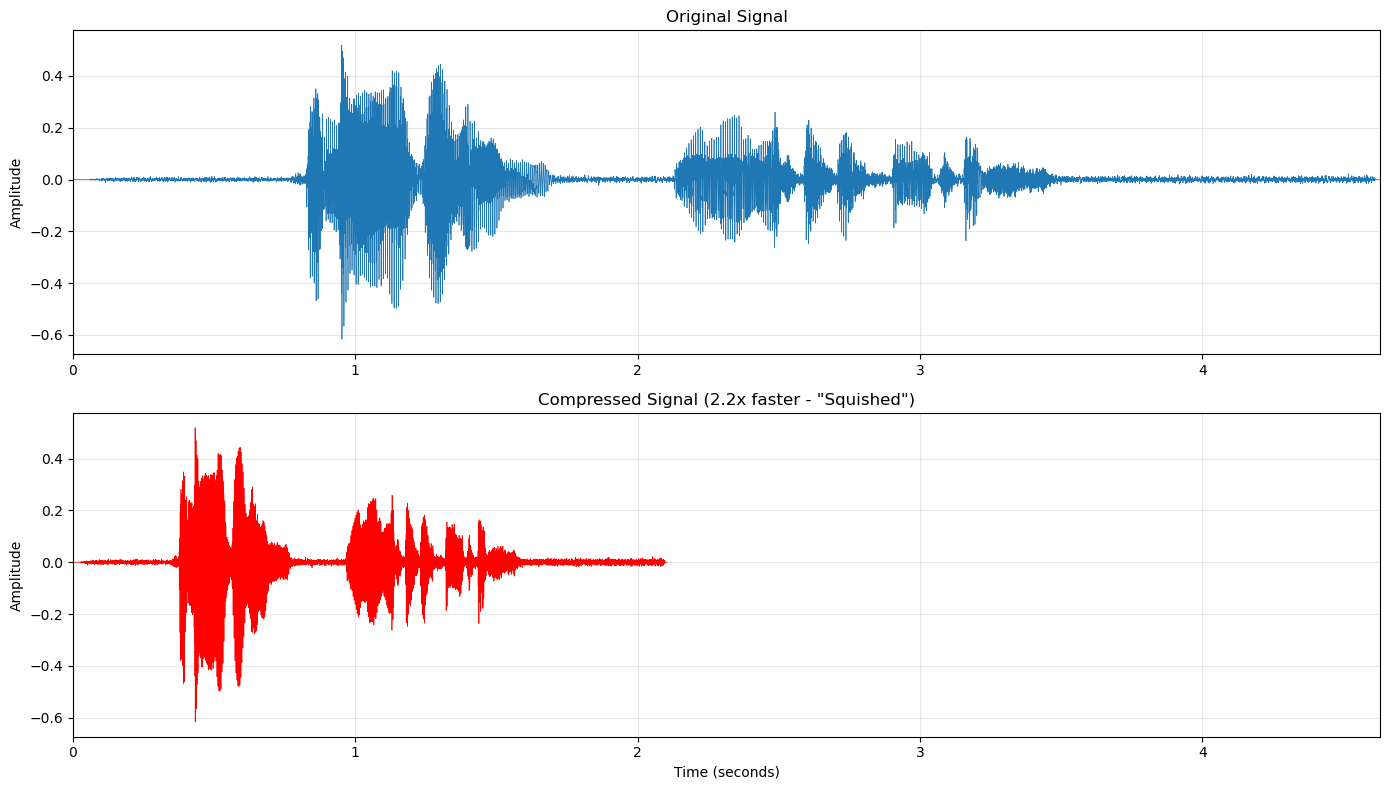

In [26]:
compression_factor = 2.2 # Can be any number
new_length = int(len(audio_data) / compression_factor)
compressed_audio = signal.resample(audio_data, new_length)

# Create new time axis for compressed signal
compressed_duration = len(compressed_audio) / sample_rate
compressed_time = np.linspace(0, compressed_duration, len(compressed_audio))

# Plot comparison
plt.figure(figsize=(14, 8))

# Original signal
plt.subplot(2, 1, 1)
plt.plot(time, audio_data, linewidth=0.5)
plt.title('Original Signal')
plt.ylabel('Amplitude')
plt.xlim(0, max(duration, compressed_duration))
plt.grid(True, alpha=0.3)

# Compressed signal
plt.subplot(2, 1, 2)
plt.plot(compressed_time, compressed_audio, linewidth=0.5, color='red')
plt.title(f'Compressed Signal ({compression_factor}x faster - \"Squished\")')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.xlim(0, max(duration, compressed_duration))
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
ipd.Audio(compressed_audio, rate=sample_rate)

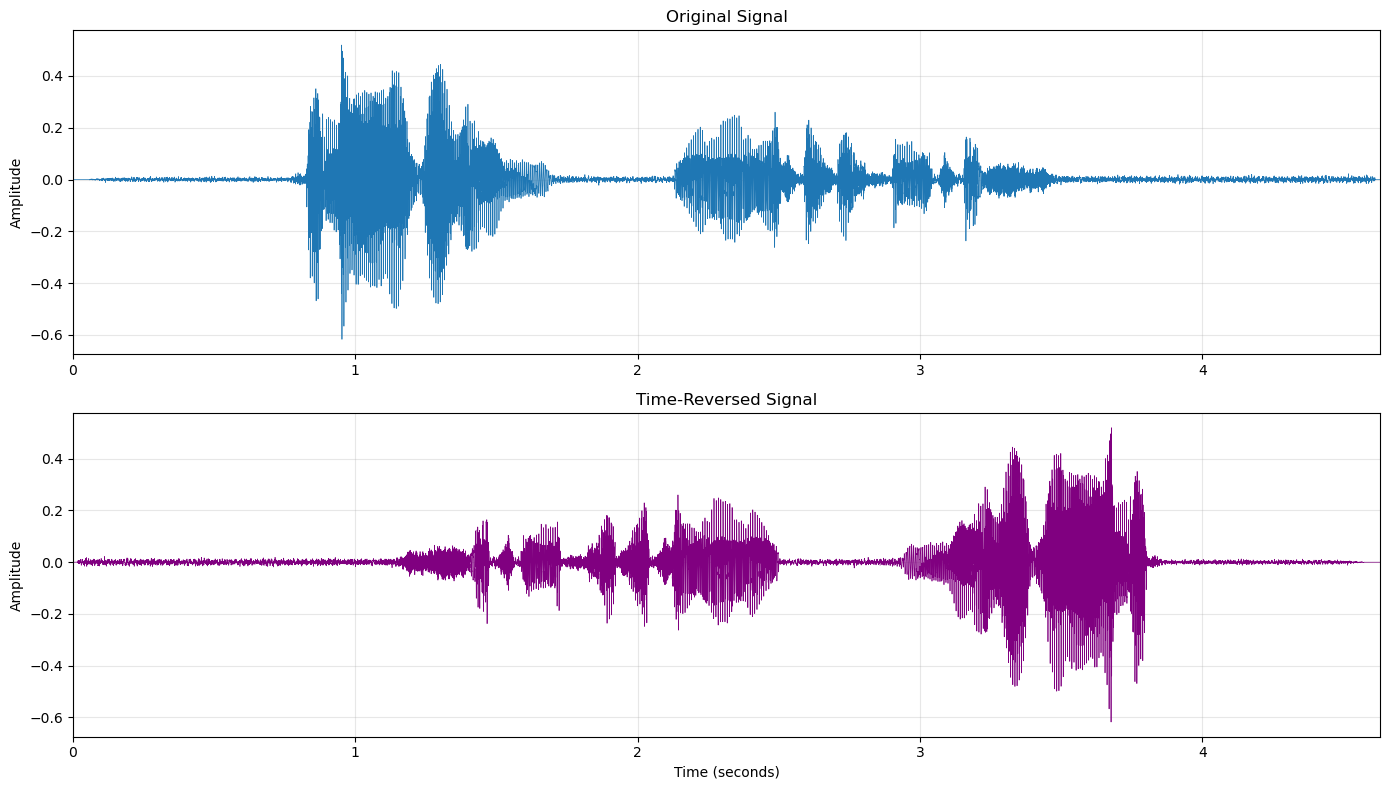

In [19]:
# Reverse the audio signal
reversed_audio = audio_data[::-1]

# Plot comparison
plt.figure(figsize=(14, 8))

# Original signal
plt.subplot(2, 1, 1)
plt.plot(time, audio_data, linewidth=0.5)
plt.title('Original Signal')
plt.ylabel('Amplitude')
plt.xlim(0, duration)
plt.grid(True, alpha=0.3)

# Reversed signal
plt.subplot(2, 1, 2)
plt.plot(time, reversed_audio, linewidth=0.5, color='purple')
plt.title('Time-Reversed Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.xlim(0, duration)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
ipd.Audio(reversed_audio, rate=sample_rate)